# Ex 1 week 5
## Tiling of the sky

## Real Code

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import camb as camb

gi

In [3]:
# define parameters:
Omegam = 0.3
OmegaL = 1 - Omegam
H0 = 70.0 / (299792)

In [4]:
# set up the redshift grid where we want to do the calculation:
redshift = np.linspace(0.5, 1100.0, 1000)
# since we want to do log plots usually logspace is better:
#redshift = np.logspace(-1., 3., 100)

### Cosmological Distance Definitions

- **Comoving distance**  
  $$R_p(z) = \int_0^z \frac{dz'}{H(z')}$$

- **Angular diameter distance** (for a flat universe, $k=0$)  
  $$R_a(z) = \frac{R_p(z)}{1+z} = \frac{1}{1+z} \int_0^z \frac{dz'}{H(z')}$$

- **Physical size of the horizon**  
$$R_h(z) = a(z) \int_{z}^{\infty} \frac{dz'}{H(z')} = \frac{\eta(z)}{1+z}$$

  where $\eta(z)$ is the conformal time.

- **Angular size of the horizon**  
  $$\theta(z) = \frac{R_h(z)}{R_a(z)}$$


### Asymptotic Behavior of the Horizon

- **Matter-dominated era ($z \gg 1$, after equality):**  
$$R_h(z) \propto (1+z)^{-3/2}$$

- **Radiation-dominated era ($z \gg z_{\rm eq}$):**  
  $$R_h(z) \propto (1+z)^{-2}$$


Let's use CAMB to obtain cosmological observables.

Text(0.5, 1.0, 'physical size of the horizon')

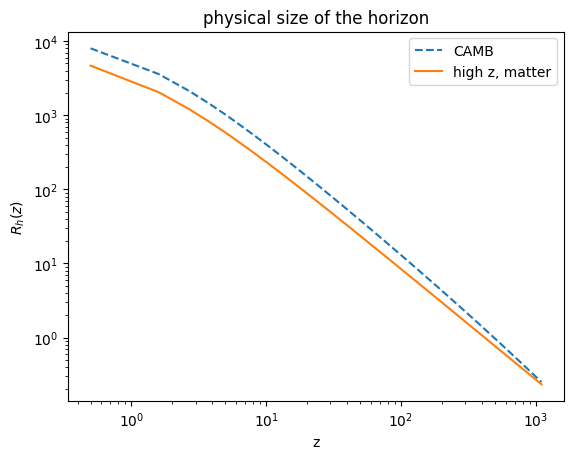

In [ ]:
# set parameters to match our cosmological model:
pars = camb.CAMBparams()
pars.set_cosmology(H0=70.0, ombh2=0.05*(70.0/100)**2, omch2=(Omegam-0.05)*(70.0/100)**2);
# set_cosmology wants the PHYSICAL DENSITIES, that is the density parameter multiplied by (H0/100)^2
# camb prende H0 in km/s/Mpc

# calculate background results:
results = camb.get_background(pars)

# calculate physical size of the horizon as a(t)eta(t)=eta(z)/(1+z):
R_h = results.conformal_time(redshift)/(1+redshift)
plt.plot(redshift, R_h, linestyle='--', label='CAMB')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$R_h(z)$')
plt.legend()

##asymptotic behavior at high z in a matter dominated universe
def rHor(z):
    return 2/H0*(1+z)**(-3.0/2)

plt.plot(redshift, rHor(redshift), label='high z, matter')
plt.legend()
plt.title('physical size of the horizon')

The difference between DM domination and LCDM is most evident at low z, when DE starts driving accelerated expansion.

Text(0.5, 1.0, 'angular diameter distance')

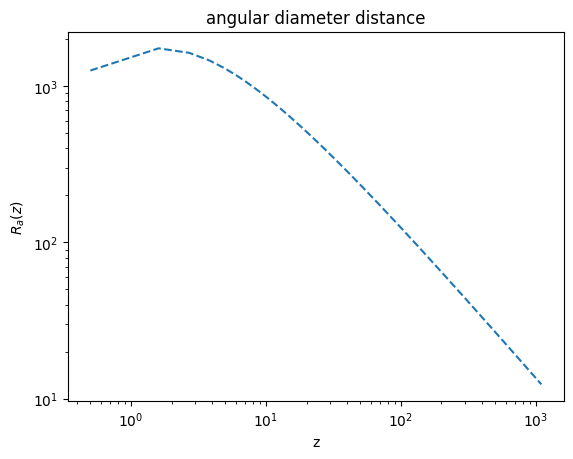

In [6]:
R_a = results.angular_diameter_distance(redshift)  ##not comoving

plt.plot(redshift, R_a, linestyle='--', label='CAMB')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$R_a(z)$')
plt.title('angular diameter distance')

### Angular size of the horizon

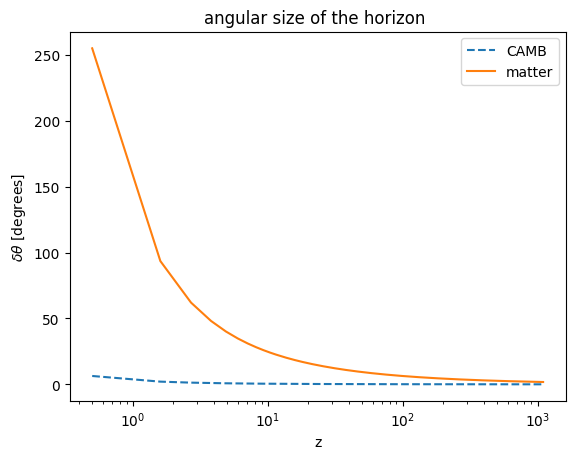

In [52]:
##calculate the angular size subtended by the horizon as a function of z
angle=R_h/R_a
plt.plot(redshift,angle, linestyle='--',label='CAMB')

def angle_matter(z):
    return (1+z)**(-1.0/2)/(1-(1+z)**(-1.0/2))

angle_matter_domination = angle_matter(redshift)

plt.plot(redshift,np.rad2deg(angle_matter_domination),label='matter')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('z')
plt.ylabel('$\delta \\theta $ [degrees]')
plt.title('angular size of the horizon ')
plt.legend()


Text(0.5, 1.0, 'CAMB - matter dominated universe')

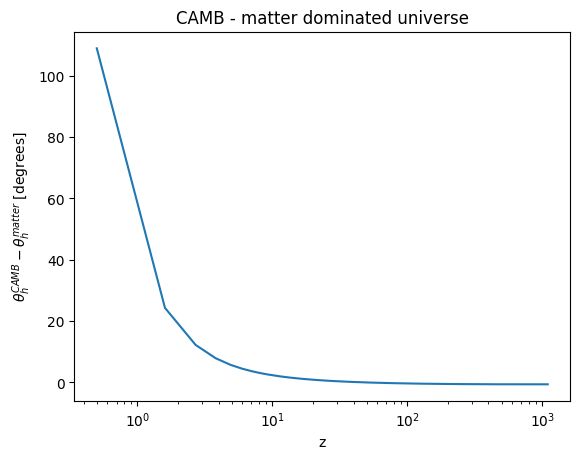

In [61]:
##difference between the camb calculations and the matter dominated universe calculations

plt.plot(redshift, np.rad2deg(angle-angle_matter_domination), label='residual')
plt.xlabel('z')
plt.ylabel(r'$\theta_{h}^{CAMB} - \theta_{h}^{matter}$ [degrees]')
plt.xscale('log')
plt.title('CAMB - matter dominated universe')

In [43]:
##angular size in degrees calculated with CAMB and with manual calculation (for a matter dominated universe)
##the second gives about 1.7 degrees as expected, the first a bit less

print(180/np.pi*angle[len(angle)-1], "degrees from CAMB")
print(180/np.pi*angle_matter_domination[len(angle_matter_domination)-1], "degrees from manual calculation")

1.1642305634426051 degrees from CAMB
1.780404888023603 degrees from manual calculation


### Area subtended by a horizon

In principle, the tile_area can be computed as

$$ A = \int_{\phi_1}^{\phi_2}\int_{\theta_1}^{\theta_2}\sin{\theta}d\theta d\phi = 2\pi(1-\cos {\Delta \theta})$$

but for small tiles of angular radius $\Delta \theta$ it reduces to $A \simeq \Delta\theta ^2 $.

In [44]:
def exact_area(theta_radius):
    return 2*np.pi*(1-np.cos(theta_radius))

In [45]:
## tile_area subtended by a horizon
tile_area = angle_matter_domination*angle_matter_domination  #approximation for small angles
sky_area = 4*np.pi*np.ones(len(angle_matter_domination))
n_tiles = sky_area/tile_area

In [46]:
ex_area = exact_area(angle_matter_domination)
ex_n_tiles = sky_area/ex_area

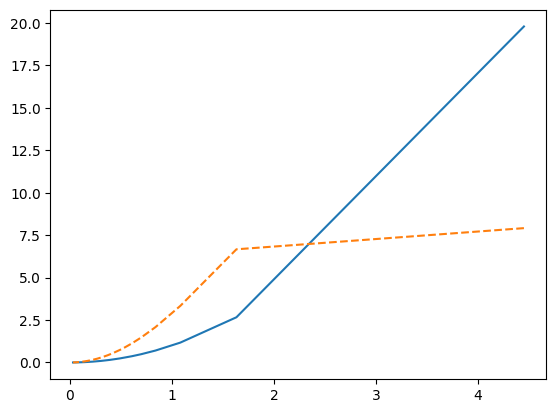

In [47]:
plt.plot(angle_matter_domination, tile_area, label='approx tile_area')
plt.plot(angle_matter_domination, ex_area, linestyle='--', label='exact tile_area')

Text(0.5, 1.0, 'number of tiles in the sky')

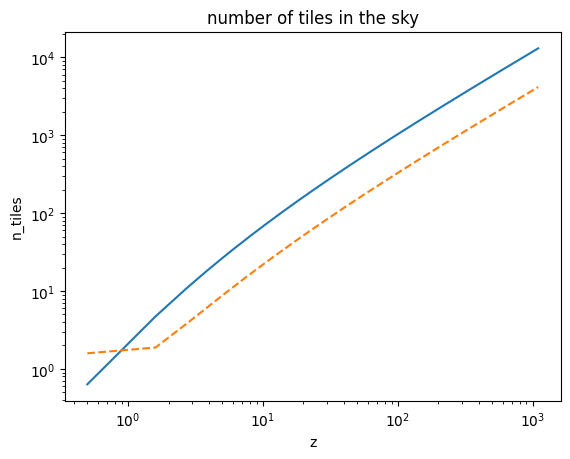

In [48]:
plt.plot(redshift, n_tiles)
plt.plot(redshift, ex_n_tiles, linestyle='--', label='exact tile_area')
plt.xlabel('z')
plt.ylabel('n_tiles')
plt.xscale('log')
plt.yscale('log')
plt.title('number of tiles in the sky')